#<h1 style="text-align:center;">PlantGrowth R Dataset Analysis</h1>  

---

![image](img/plant_growth.webp)

The Plant Growth dataset, originally presented in Dobson, A. J. (1983) *An Introduction to Statistical Modelling* (London: Chapman and Hall), consists of dried plant weight measurements divided into three groups, each with 10 observations. The first group, labeled ctrl (control), represents the yield of plants grown under normal conditions and serves as the baseline or “before” sample. The second and third groups, labeled trt1 and trt2 (treatment 1 and treatment 2), represent the yields of plants subjected to two distinct treatments, which can be considered “after” samples.

This dataset provides a foundation for evaluating the impact of experimental treatments on plant growth. By comparing the dried weights among these groups, it is possible to assess the relative effectiveness of the treatments using statistical methods such as t-tests and analysis of variance (ANOVA). As a teaching example, the dataset illustrates concepts in experimental design and hypothesis testing, making it a valuable tool in statistical education and research.

As a first step in analyzing the results of the treatments represented by the 'after' samples, we will compare their means with the corresponding 'before' baseline. The t-test is particularly appropriate for assessing whether the differences observed are statistically significant or merely due to chance. However, before conducting the comparisons, it is necessary to verify the assumptions of normality and independence of the paired samples to ensure the validity of the results. The labraries that we are going to utilise for the present study will be the followings:

1. **math**:
   - The `math` library provides a set of mathematical functions such as logarithms, square roots, trigonometric functions, and constants (e.g., π). It's essential for carrying out basic mathematical operations, expecially for statistical calculations, and including any other type numerical analyses.

2. **random**:
   - The `random` library allows for random selections, which is necessary when dealing with sampling methods, such as simulating datasets, shuffling data, or generating random variables. It will be helpful for tasks like creating random samples from distributions or testing hypothesis.

3. **csv**:
   - The `csv` module is lightweight, efficient, and suitable for most CSV-related tasks, though for more complex cases (e.g., larger datasets), pandas may be a more powerful alternative.

4. **numpy**:
   - `numpy` is a core library for numerical computing in Python. It provides support for arrays and matrices, along with a vast range of mathematical functions for numerical operations. `numpy` is crucial for generating random data, performing array manipulations, and applying advanced mathematical functions—particularly when working with large datasets and statistical distributions, such as the normal distribution.
   
5. **matplotlib,pyplot**:
   - `matplotlib.pyplot` is a plotting library used to create static, animated, and interactive visualizations in Python. It is essential for graphing data distributions,  such as visualizing the normal distribution or plotting results from hypothesis tests like the t-test or ANOVA. Visualizations are key to interpreting and presenting data clearly.

6. **scipy.stats**:
   - `scipy.stats` is a submodule of the `scipy` library that provides a comprehensive range of statistical functions. It includes tools for hypothesis testing, probability distributions, and statistical tests, such as the t-test and ANOVA. This library is vital for performing rigorous statistical analysis and hypothesis testing in the assignment.

7. **statsmodels**:
   - `statsmodels` is a library for statistical modeling, which includes tools for performing regression analysis, hypothesis testing, and statistical inference. It's useful for more advanced statistical models and tests that go beyond basic functions. This library will be beneficial when applying more complex statistical methods, like ANOVA or regression models.

8. **pandas**:
   - `pandas` is a powerful library for data manipulation and analysis, offering data structures like DataFrames and Series for handling structured data efficiently. It provides functions to clean, transform, and explore datasets, making it easier to preprocess data for statistical analysis or machine learning tasks. The library integrates well with other libraries like statsmodels and numpy, serving as a foundation for managing data in preparation for more advanced analyses.  

9. **seaborn**:
   - `seaborn` is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies complex visualizations like heatmaps, violin plots, and pair plots, making it ideal for exploring and presenting data. It integrates well with pandas for handling DataFrames and offers built-in themes and color palettes to enhance the visual appeal of plots.

In [33]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# CSV format data reading 
import csv

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

# Mathematical functions.
import math

# Data manipulation.
import pandas as pd

# Statistical plots.
import seaborn as sns

### Data Presentation

The **PlantGrowth R Dataset** was downloaded in CSV format and consists of 30 cases with 2 variables:

`weight`: A numeric variable representing the weights of the plants.
`group`: A categorical variable that divides the data into three groups: `ctrl`, `trt1`, and `trt2`.

In [ ]:
# Open the CSF file.
with open('data/plant_growth_r.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


['rownames', 'weight', 'group']
['1', '4.17', 'ctrl']
['2', '5.58', 'ctrl']
['3', '5.18', 'ctrl']
['4', '6.11', 'ctrl']
['5', '4.5', 'ctrl']
['6', '4.61', 'ctrl']
['7', '5.17', 'ctrl']
['8', '4.53', 'ctrl']
['9', '5.33', 'ctrl']
['10', '5.14', 'ctrl']
['11', '4.81', 'trt1']
['12', '4.17', 'trt1']
['13', '4.41', 'trt1']
['14', '3.59', 'trt1']
['15', '5.87', 'trt1']
['16', '3.83', 'trt1']
['17', '6.03', 'trt1']
['18', '4.89', 'trt1']
['19', '4.32', 'trt1']
['20', '4.69', 'trt1']
['21', '6.31', 'trt2']
['22', '5.12', 'trt2']
['23', '5.54', 'trt2']
['24', '5.5', 'trt2']
['25', '5.37', 'trt2']
['26', '5.29', 'trt2']
['27', '4.92', 'trt2']
['28', '6.15', 'trt2']
['29', '5.8', 'trt2']
['30', '5.26', 'trt2']


To better understand the data and facilitate value manipulation, we will create a DataFrame named `group_df`. 

In [19]:
# Create a DataFrame.
group_df = pd.read_csv('/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/applied_statistics_assessment/data/plant_growth_r.csv')

# Eliminate the 'rownames' column.
group_df = group_df.drop(columns=['rownames'])

# Show.
group_df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [ ]:
# Show basic statistics for numeric columns.
group_df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


Once the DataFrame is created and we have given a general overview of the information we are examining, the data will be divided into three groups: the "before" yield weights and the two "after" yield weights.

In [24]:
# Forming three groups
weight_baseline = group_df['weight'][:10]
weight_trt1 = group_df['weight'][10:20]
weight_trt2 = group_df['weight'][20:30]

# Single group mean calculation.
mean_baseline = weight_baseline.mean()
mean_trt1 = weight_trt1.mean()
mean_trt2 = weight_trt2.mean()

print("Baseline mean:", mean_baseline)
print("Treatment 1 mean:", mean_trt1)
print("Treatment 2 mean:", mean_trt2)

Baseline mean: 5.031999999999999
Treatment 1 mean: 4.661
Treatment 2 mean: 5.526


From these means, it appears that the average yield weight for Treatment 1 is lower than the baseline, while Treatment 2 has a higher average yield weight compared to the baseline. While manually computing the means provides a snapshot of the differences, it does not tell us whether these differences are statistically significant or if they could have occurred by random chance. the mean for Treatment 2 (5.526) is higher than the Baseline mean (5.032), it’s possible that the observed difference is due to random variation. Similarly, the lower mean for Treatment 1 (4.661) might not be statistically significant if the data has high variability.

A t-test is necessary because:  

=> Means alone do not consider the variability (spread) of data within each group. Even if the means differ, overlapping variances might indicate no significant difference. 

=> A t-test allows us to formally test the null hypothesis (that the group means are equal) against the alternative hypothesis (that there is a significant difference in means).  

=> A t-test provides a p-value, which helps determine whether the observed differences are statistically significant based on a chosen significance level (e.g., 0.05).  

=> The t-test considers the size of the samples. Smaller samples require stronger evidence to conclude significant differences, whereas manual comparison cannot adjust for this.  

=> Visual or manual comparisons of means can be misleading or subjective. The t-test provides an objective mathematical approach to assess differences.

### Assumptions

To assess the validity of the t-test, it is necessary to verify that the differences between the paired observations are approximately normally distributed and that the two pairs of variables, `weight_baseline` - `weight_trt1` and `weight_baseline` - `weight_trt2`, are independent of each other.

**ASSUMPTION NO1: Normally distributed data**  

To check if the difference between the paired observations is approximately normally distributed, we can again plot the values as histograms and create an x range for the probability density function to see if its curve is bell shaped and visually ressemble.

In [31]:
# Difference between the paired variables.
first_treatment = np.array(weight_baseline) - np.array(weight_trt1)
second_treatment = np.array(weight_baseline) - np.array(weight_trt2)

# Show results.
first_treatment, second_treatment


(array([-0.64,  1.41,  0.77,  2.52, -1.37,  0.78, -0.86, -0.36,  1.01,
         0.45]),
 array([-2.14,  0.46, -0.36,  0.61, -0.87, -0.68,  0.25, -1.62, -0.47,
        -0.12]))

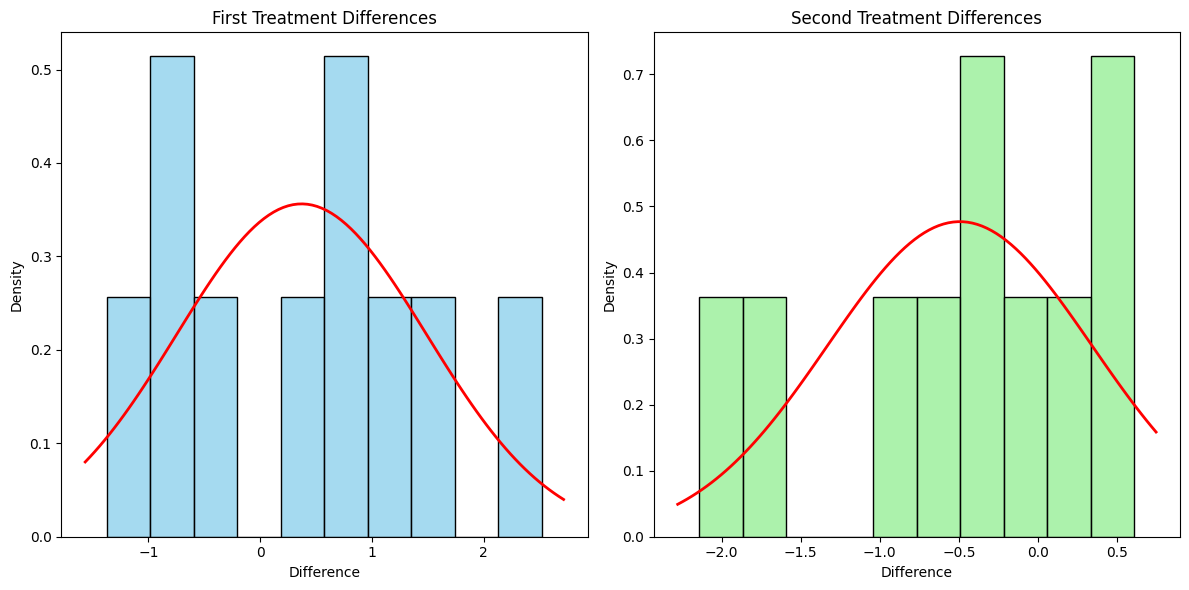

In [36]:
# Importing norm module from Scipy stats to create a normal distribution.
from scipy.stats import norm

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
sns.histplot(first_treatment, kde=False, ax=axes[0], color='skyblue', bins=10, stat="density")
# Fit and plot a normal distribution on the first histogram
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(first_treatment), np.std(first_treatment))
axes[0].plot(x, p, 'r-', lw=2)

axes[0].set_title('First Treatment Differences')
axes[0].set_xlabel('Difference')
axes[0].set_ylabel('Density')

# Plot the second histogram
sns.histplot(second_treatment, kde=False, ax=axes[1], color='lightgreen', bins=10, stat="density")
# Fit and plot a normal distribution on the second histogram
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(second_treatment), np.std(second_treatment))
axes[1].plot(x, p, 'r-', lw=2)

axes[1].set_title('Second Treatment Differences')
axes[1].set_xlabel('Difference')
axes[1].set_ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

The red line is the probability density function (PDF) of a normal distribution fitted to the data. The `norm.pdf` was used to calculate the normal distribution based on the mean and standard deviation of the differences and its resulting plot is scaled by the number of bins in the histogram to match the scale of the histogram. However, both histograms deviate from normality appearing bimodal and this may due to the random nature of the sample collections.  

As a matter of fact, a more reliable method to check whether a dataset follow a normal distribution or not is the [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test). It is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution and, if the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.  

It’s an easy-to-use statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation, but in Python, we see that a sample size larger than 5,000 will give us an approximate calculation for the p-value.

In [37]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(first_treatment)
print(f"First treatment: p-value = {p_value}")
stat, p_value = shapiro(second_treatment)
print(f"Second treatment: p-value = {p_value}")

First treatment: p-value = 0.8755001504478122
Second treatment: p-value = 0.6472396906374438


We can confirm the null hypothesis that the data are normally distributed. In fact, in a Shapiro-Wilkin test, the threshold ($α$) is typically set to $0.05$ ($5\%%):  

- If $p≥0.05$: The data are considered normal enough for parametric tests (e.g., t-test, ANOVA).  
- If $p<0.05$: The data are considered not normal, and non-parametric methods might be more appropriate.  

**ASSUMPTION NO2: the two pairs of variables are independent of each other**  

### t-Test

### Null Hypothesis

___

## End